# Image Classification Basic (1) 

In [1]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
os.getcwd()

'C:\\Users\\samsung\\Desktop\\datascience lab\\FastCampus Deep Learning'

### 1. getting Images
- 폴더 안에 있는 모든 png형식의 사진 불러오기

In [8]:
# label별 폴더가 있음
os.listdir('dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
# 0 label
# '*' 모두 가져오기
glob('dataset/mnist_png/training/0/*.png')

['dataset/mnist_png/training/0\\1.png',
 'dataset/mnist_png/training/0\\1000.png',
 'dataset/mnist_png/training/0\\10005.png',
 'dataset/mnist_png/training/0\\10010.png',
 'dataset/mnist_png/training/0\\10022.png',
 'dataset/mnist_png/training/0\\10025.png',
 'dataset/mnist_png/training/0\\10026.png',
 'dataset/mnist_png/training/0\\10045.png',
 'dataset/mnist_png/training/0\\10069.png',
 'dataset/mnist_png/training/0\\10071.png',
 'dataset/mnist_png/training/0\\10080.png',
 'dataset/mnist_png/training/0\\10083.png',
 'dataset/mnist_png/training/0\\10107.png',
 'dataset/mnist_png/training/0\\10119.png',
 'dataset/mnist_png/training/0\\10120.png',
 'dataset/mnist_png/training/0\\10121.png',
 'dataset/mnist_png/training/0\\10128.png',
 'dataset/mnist_png/training/0\\10140.png',
 'dataset/mnist_png/training/0\\1015.png',
 'dataset/mnist_png/training/0\\10167.png',
 'dataset/mnist_png/training/0\\10168.png',
 'dataset/mnist_png/training/0\\10176.png',
 'dataset/mnist_png/training/0\\1018.p

In [11]:
# 0~9 label
data_paths = glob('dataset/mnist_png/training/*/*.png')

In [13]:
len(data_paths)

60000

### 2. label 개수 확인

- label 0의 데이터 개수 확인

In [17]:
label_nums = os.listdir('dataset/mnist_png/training/')
print(len(label_nums))
label_nums

10


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

- 데이터 별 개수 비교

In [18]:
num_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('dataset/mnist_png/training/' + lbl_n)
    num_dataset.append(len(data_per_class))

In [19]:
num_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [20]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

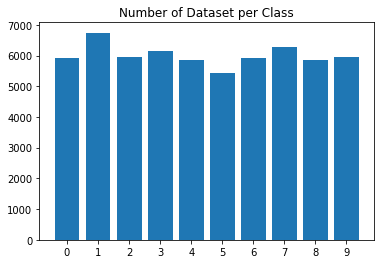

In [22]:
plt.bar(label_nums, num_dataset)
plt.title('Number of Dataset per Class')
plt.show()

### 3. Image 확인하기

- Pillow로 열기

In [25]:
path = data_paths[0]
path

'dataset/mnist_png/training\\0\\1.png'

In [26]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [27]:
image.shape# channel X (28,28)

(28, 28)

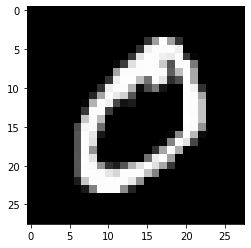

In [28]:
plt.imshow(image,'gray') 
plt.show()

- Tensorflow로 열기

In [29]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [30]:
image.shape # channel O

TensorShape([28, 28, 1])

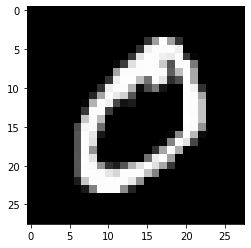

In [31]:
#plt.imshow(image,'gray')
plt.imshow(image[:,:,0], 'gray')
plt.show()

### 4. Label 얻기

In [32]:
path

'dataset/mnist_png/training\\0\\1.png'

In [33]:
path.split('\\')

['dataset/mnist_png/training', '0', '1.png']

In [34]:
label = path.split('\\')[1]
int(label)

0

In [35]:
def get_label(path):
    class_name = path.split('\\')[1]
    label = int(class_name)
    return label

In [37]:
get_label(path)

0

### 5. Image size 파악

In [38]:
from tqdm import tqdm_notebook

In [39]:
heights = []
widths = []

In [41]:
# file 개수
len(data_paths)

60000

In [43]:
img_pil = Image.open(path)
image = np.array(img_pil)
h,w = image.shape
print(h)
print(w)

28
28


In [44]:
for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h,w = image.shape
    
    heights.append(h)
    widths.append(w)

- 모든 사진의 size가 같다! (28*28)

In [45]:
np.unique(heights)

array([28])

In [46]:
np.unique(widths)

array([28])

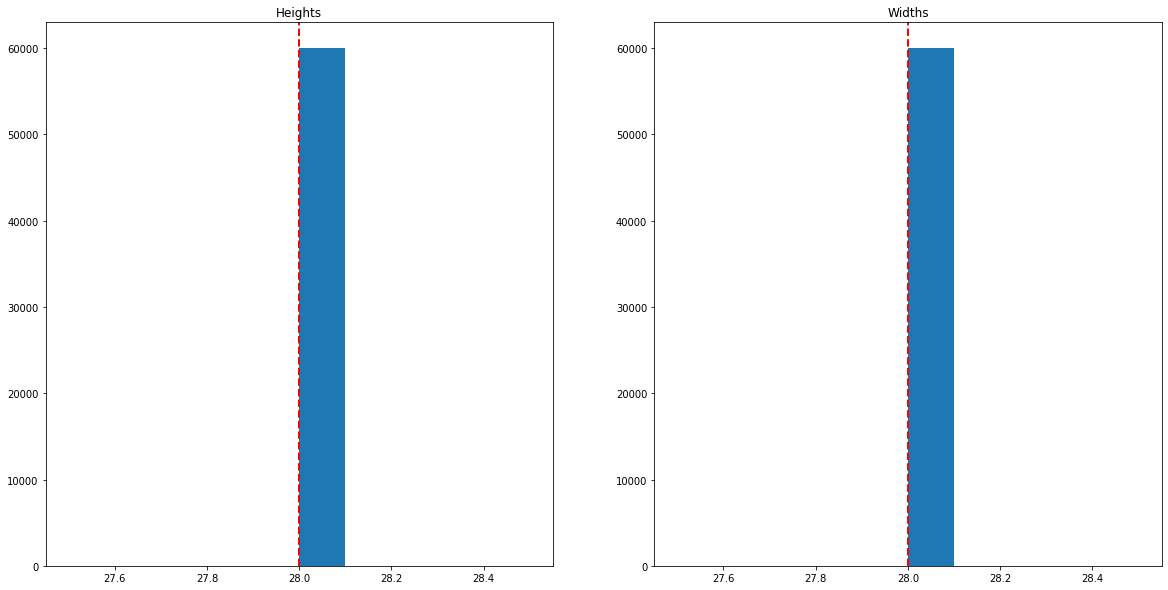

In [49]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()